In [2]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
from datetime import datetime
import time

from sklearn.model_selection import train_test_split

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

plt.rcParams['figure.figsize']=(23,8)
def twosubplots(figsize=(23,8)):
    return plt.subplots(1,2,figsize=figsize)[1]

# Data

In [3]:
Data = pd.read_csv('Data.csv')

In [23]:
Region = pd.read_csv('Region.csv')

In [24]:
StoreCount = Region.groupby('RegionId').agg({'StoreId':lambda x: x.nunique()}).rename(columns={'StoreId':'StoreCount'}).reset_index()

In [25]:
Region = pd.merge(left = Region , right=StoreCount , left_on = 'RegionId' , right_on='RegionId').reset_index(drop=True)

In [26]:
Region

,StoreId,RegionId,StoreCount
0,-1,-1.0,1
1,81,0.0,83
2,147,0.0,83
3,262,0.0,83
4,548,0.0,83
...,...,...,...
1252,4896,9.0,49
1253,4897,9.0,49
1254,4898,9.0,49
1255,5162,9.0,49


In [28]:
Region_stores = Region.groupby('RegionId').agg({'StoreId':lambda x: list(','.join(map(str , x)).split(',')) , 'StoreCount':'first'})

In [32]:
Region_stores

,StoreId,StoreCount
RegionId,,
-1.0,[-1],1
0.0,"[81, 147, 262, 548, 623, 698, 770, 816, 1959, ...",83
1.0,"[944, 1958, 2035, 2036, 2037, 2038, 2039, 2040...",106
2.0,"[224, 1994, 1995, 1996, 1997, 1998, 1999, 2000...",194
3.0,"[54, 2007, 2008, 2009, 2029, 2030, 2031, 2032,...",94
4.0,"[2046, 2047, 2048, 2049, 2050, 2051, 2053, 205...",161
6.0,"[203, 336, 2010, 2011, 2012, 2013, 2014, 2015,...",83
7.0,"[2025, 2026, 2027, 2028, 2067, 2248, 2249, 225...",52
8.0,"[282, 1988, 1989, 1990, 1991, 1992, 1993, 2160...",114


In [ ]:
# Region = pd.merge(left = Region , right= RegionStores , left_on='RegionId' , right_on = 'RegionId')

In [33]:
Product = pd.read_csv('Product.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Filtering out a product that was a sample and not paid for. 

In [34]:
Product[Product['ProductId']==187613]

,ProductId,CreatedOn,Product,Barcode,BrandId,Brand,CategoryId,Category1Id,Category2Id,Category3Id,Category4Id,Category1Name,Category2Name,Category3Name,Category4Name,ProductStateCode,ResponsibleUser,Supplier,CountActiveStore
3086,187613,20200831,ساشه شامپو لپیور*اشانتیون,9.79965e+12,34069,لپیور,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,نامشخص,خدمات تحقيقاتي آرين گستر,1105


In [35]:
Product_names = Product.drop( columns=['CreatedOn', 'Brand' , 'BrandId',
       'CategoryId', 'Category1Id', 'Category2Id', 'Category3Id',
       'Category4Id', 'Category1Name', 'Category2Name', 'Category3Name',
       'Category4Name', 'ProductStateCode', 'ResponsibleUser', 'Supplier',
       'CountActiveStore'])

In [36]:
DataF = Data.drop(Data[Data['ProductId']==187613].index).reset_index(drop=True)

In [37]:
DataF_Jan = DataF[DataF['DateBlock']==202101]

# The percent of Regions that have the products 

In [38]:
DataF_Jan = pd.merge(left = DataF_Jan , right = Region , left_on = 'StoreId' , right_on = 'StoreId').reset_index(drop=True)

In [39]:
DataF_Jan_grouped = DataF_Jan.groupby(['ProductId' , 'RegionId']).agg({'StoreId':
                                                                       #[lambda x: list(','.join(map(str , x)).split(',')) , 
                                                                       lambda y: y.nunique()
                                                                       #]
                                                                       , 'StoreCount':'first' }).reset_index()

In [40]:
DataF_Jan_grouped.columns = ['ProductId' , 'RegionId' , 
                             #'Stores' , 
                             'ProductStoreCount' , 'RegionStoreCount']

In [41]:
DataF_Jan_grouped['PSC/RSC'] = round(DataF_Jan_grouped['ProductStoreCount']*100/DataF_Jan_grouped['RegionStoreCount'],2)

In [42]:
DataF_Jan_grouped['Region_percent'] = list(zip(DataF_Jan_grouped['RegionId'] , DataF_Jan_grouped['PSC/RSC']))

In [43]:
DataF_Jan_grouped

,ProductId,RegionId,ProductStoreCount,RegionStoreCount,PSC/RSC,Region_percent
0,3,0.0,14,83,16.87,"(0.0, 16.87)"
1,3,1.0,42,106,39.62,"(1.0, 39.62)"
2,3,2.0,39,194,20.10,"(2.0, 20.1)"
3,3,3.0,20,94,21.28,"(3.0, 21.28)"
4,3,4.0,62,161,38.51,"(4.0, 38.51)"
...,...,...,...,...,...,...
50869,191402,0.0,2,83,2.41,"(0.0, 2.41)"
50870,191403,0.0,2,83,2.41,"(0.0, 2.41)"
50871,191404,0.0,3,83,3.61,"(0.0, 3.61)"
50872,191409,0.0,1,83,1.20,"(0.0, 1.2)"


In [44]:
Product_Region_percent = DataF_Jan_grouped.groupby('ProductId').agg({'Region_percent':lambda x: list(','.join(map(str , x)).split(','))}).reset_index()

In [45]:
Product_Region_percent

,ProductId,Region_percent
0,3,"[(0.0, 16.87), (1.0, 39.62), (2.0, 20.1), (..."
1,6,"[(0.0, 4.82)]"
2,7,"[(0.0, 2.41)]"
3,8,"[(0.0, 4.82)]"
4,9,"[(0.0, 10.84), (1.0, 58.49), (2.0, 55.67), ..."
...,...,...
12788,191402,"[(0.0, 2.41)]"
12789,191403,"[(0.0, 2.41)]"
12790,191404,"[(0.0, 3.61)]"
12791,191409,"[(0.0, 1.2)]"


In [58]:
Product_Region_Score = DataF_Jan_grouped.groupby('ProductId').agg({'PSC/RSC':lambda x: (x>29.5).count()}).rename(columns={'PSC/RSC':'Region_30percent_Count'}).reset_index()

In [61]:
Product_Region_Score

,ProductId,30percent_Region_Count
0,3,15.0
1,6,1.0
2,7,1.0
3,8,1.0
4,9,15.0
...,...,...
12788,191402,1.0
12789,191403,1.0
12790,191404,1.0
12791,191409,1.0


The data from March 2020. This includes the product Id and the Quantity it has been ordered in that order Id, but it is not a repeated version

Making Lists of orders from the data

The repeated products based on the quantity ordered

In [62]:
# Done and commented
Datarep = DataF_Jan.loc[DataF_Jan.index.repeat(DataF_Jan.Quantity)].reset_index(drop=True)

In [63]:
Datarep

,OrderPartId,OrderId,CustomerId,StoreId,CreateOn,ProductId,Quantity,DateBlock,RegionId,StoreCount
0,8043350,8396483,4525097,3713,20210108,150298,2.0,202101,3.0,94
1,8043350,8396483,4525097,3713,20210108,150298,2.0,202101,3.0,94
2,8043350,8396483,4525097,3713,20210108,182420,2.0,202101,3.0,94
3,8043350,8396483,4525097,3713,20210108,182420,2.0,202101,3.0,94
4,8043350,8396483,4525097,3713,20210108,1681,2.0,202101,3.0,94
...,...,...,...,...,...,...,...,...,...,...
13513811,9686623,10042472,1918353,5216,20210130,10453,1.0,202101,6.0,83
13513812,9686623,10042472,1918353,5216,20210130,15398,1.0,202101,6.0,83
13513813,9687086,10042935,1916361,5216,20210130,15398,1.0,202101,6.0,83
13513814,9685668,10041513,5520888,5216,20210130,409,1.0,202101,6.0,83


In [64]:
Total_Number_of_products_ordered = Datarep.shape[0]
Total_Number_of_products_ordered

13513816

In [65]:
Number_of_Baskets = DataF.OrderId.nunique()
Number_of_Baskets

7174702

## The most ordered products

In [66]:
Number_of_products_ordered = DataF_Jan.groupby('ProductId').agg({'Quantity':'sum' , 
                                                                 #'RegionId':lambda x: x.nunique(), 'StoreId':lambda x: x.nunique()
                                                                }).reset_index()

In [67]:
Number_of_products_ordered.sort_values(by='Quantity' , ascending = False)

,ProductId,Quantity
96,428,255516.0
7,18,168569.0
5623,150322,113328.0
93,423,110406.0
54,219,75811.0
...,...,...
6110,170753,1.0
11478,188469,1.0
6117,170788,1.0
6119,170790,1.0


In [68]:
Number_of_products_ordered = Number_of_products_ordered.rename(columns = {'Quantity':'QuantitySum' , 
#                                                                           'RegionId':'UniqueRegions' , 'StoreId':'UniqueStores'
                                                                         })

In [69]:
Number_of_products_ordered = Number_of_products_ordered.sort_values(by='QuantitySum' , ascending = False).reset_index(drop=True)

In [70]:
Number_of_products_ordered

,ProductId,QuantitySum
0,428,255516.0
1,18,168569.0
2,150322,113328.0
3,423,110406.0
4,219,75811.0
...,...,...
12788,170753,1.0
12789,188469,1.0
12790,170788,1.0
12791,170790,1.0


In [71]:
Number_of_products_ordered_names = pd.merge(left = Number_of_products_ordered , 
                                            right = Product_names , left_on='ProductId' , 
                                            right_on = 'ProductId')

In [72]:
Number_of_products_ordered_names

,ProductId,QuantitySum,Product,Barcode
0,428,255516.0,نوشابه خانواده 1500 سی سی کوکا کولا,6260265100264
1,18,168569.0,ویفر رنگارنگ 14.5 گرمی مینو,6260100121362
2,150322,113328.0,ماکارونی 700 گرمی رشد\r\n,6.26017e+12
3,423,110406.0,کیک مغزدار تاینی دوقلو 60 گرمی شیرین عسل,6261149047200
4,219,75811.0,بیسکوییت ساقه طلایی 200 گرمی مینو,6260111310106
...,...,...,...,...
12663,170753,1.0,سماق قرمز نمکپاش 100 گرمی برتر,6.26018e+12
12664,188469,1.0,تپل برگر 85 درصد گوشت 500 گرمی اروئی,6.26012e+12
12665,170788,1.0,فلفل سیاه 450 گرمی برتر,6.26018e+12
12666,170790,1.0,فلفل قرمز 450 گرمی برتر,6.26018e+12


<AxesSubplot:>

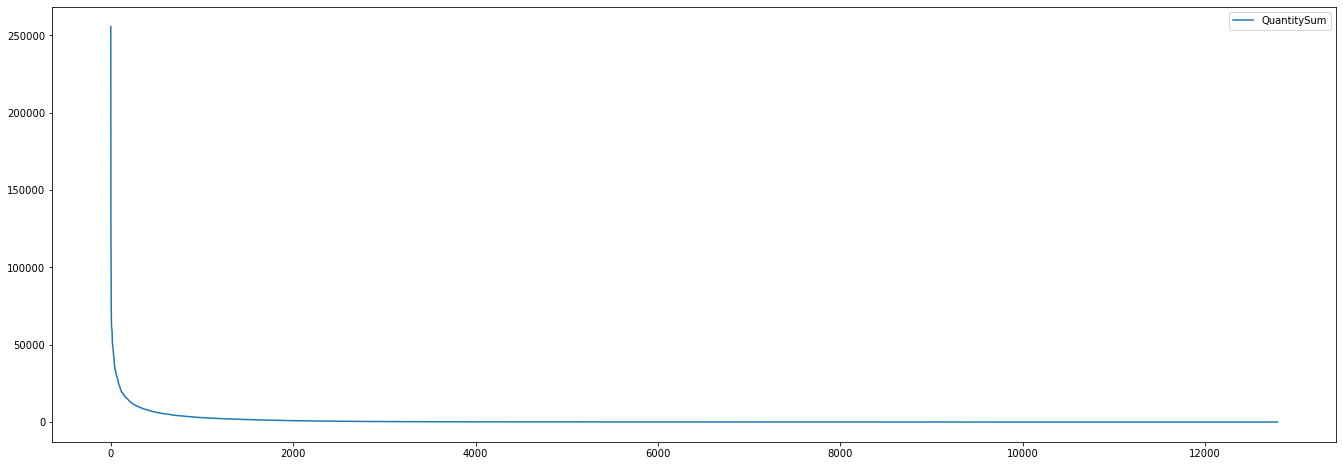

In [73]:
Number_of_products_ordered.plot(y='QuantitySum')

<AxesSubplot:xlabel='ProductId'>

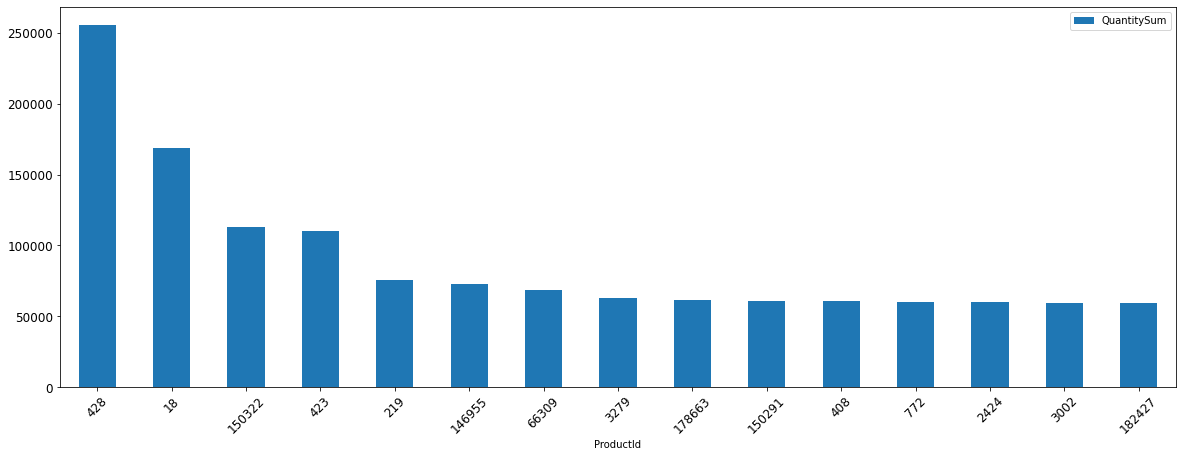

In [74]:
Number_of_products_ordered[Number_of_products_ordered.index<15].plot.bar(x = 'ProductId',y = 'QuantitySum' , grid=False, rot=45, fontsize=12 , figsize=(20,7))

Percent of the products ordered

In [75]:
Number_of_products_ordered_names['Product_percent'] = round(Number_of_products_ordered_names['QuantitySum']*100/Total_Number_of_products_ordered , 3)

In [76]:
Number_of_products_ordered_names = Number_of_products_ordered_names.sort_values(by='Product_percent',ascending=False)

In [77]:
Number_of_products_ordered_names.columns

Index(['ProductId', 'QuantitySum', 'Product', 'Barcode', 'Product_percent'], dtype='object')

In [78]:
Number_of_products_ordered_names.Product_percent.sum()

99.35200000000003

In [85]:
Number_of_products_ordered_names.head()

,ProductId,QuantitySum,Product,Barcode,Product_percent
0,428,255516.0,نوشابه خانواده 1500 سی سی کوکا کولا,6260265100264,1.891
1,18,168569.0,ویفر رنگارنگ 14.5 گرمی مینو,6260100121362,1.247
2,150322,113328.0,ماکارونی 700 گرمی رشد\r\n,6.26017e+12,0.839
3,423,110406.0,کیک مغزدار تاینی دوقلو 60 گرمی شیرین عسل,6261149047200,0.817
4,219,75811.0,بیسکوییت ساقه طلایی 200 گرمی مینو,6260111310106,0.561


In [87]:
Product_Score = Number_of_products_ordered_names.drop(columns=['QuantitySum', 'Product', 'Barcode'])

In [88]:
Product_Score

,ProductId,Product_percent
0,428,1.891
1,18,1.247
2,150322,0.839
3,423,0.817
4,219,0.561
...,...,...
7713,187932,0.000
7712,173586,0.000
7711,184684,0.000
7710,58976,0.000


## The most Popular products

The popularity is how many orders contain a certain product 


In [89]:
DataF_Order_Customer_Product = DataF.drop(columns=['OrderPartId', 'CreateOn','DateBlock'])

In [90]:
DataF_Order_Customer_Product

,OrderId,CustomerId,StoreId,ProductId,Quantity
0,2524907,1335637,2225,6318,2.0
1,2524939,1375569,2259,11309,1.0
2,2524503,516102,1966,181291,1.0
3,2524510,1394965,2099,11868,1.0
4,2524517,1379803,1981,159,4.0
...,...,...,...,...,...
38576878,10032462,4513745,5028,8993,1.0
38576879,10032478,5345183,4898,8841,2.0
38576880,10032493,3789794,2342,18396,1.0
38576881,10032495,2954712,2388,2945,2.0


Making customerIds into a string to count how many customers ordered the same thing

In [91]:
Number_of_baskets = DataF_Order_Customer_Product.OrderId.nunique()
Number_of_baskets

7174702

In [92]:
DataF_Order_Customer_Product.CustomerId.nunique()

2671290

This gives the unique number count of Orders (Baskets) and CustomerIds that have a productId in them

In [93]:
Number_of_baskets_customer_per_product = DataF_Order_Customer_Product.groupby('ProductId').agg({'OrderId':lambda x: x.nunique(), 
                    'CustomerId':lambda x: x.nunique()}).rename(columns={'OrderId':'BasketsCount',
                                                                         'CustomerId':'UniqueCustomersCount'}).sort_values(by='BasketsCount',ascending=False).reset_index()

In [94]:
Number_of_baskets_customer_per_product

,ProductId,BasketsCount,UniqueCustomersCount
0,428,302724,218474
1,8068,162709,114410
2,2424,133205,102717
3,9787,120677,98411
4,12095,117812,77074
...,...,...,...
18096,57800,1,1
18097,58006,1,1
18098,187965,1,1
18099,58618,1,1


In [95]:
Number_of_baskets_customer_per_product['percent_basket'] = round(Number_of_baskets_customer_per_product['BasketsCount']*100/Number_of_baskets , 2)

In [96]:
Number_of_baskets_customer_per_product['percent_customers'] = round(Number_of_baskets_customer_per_product['UniqueCustomersCount']*100/Number_of_baskets , 2)

In [97]:
Number_of_baskets_customer_per_product = Number_of_baskets_customer_per_product.sort_values(by='percent_basket',ascending=False).reset_index(drop=True)

In [98]:
Number_of_baskets_customer_per_product

,ProductId,BasketsCount,UniqueCustomersCount,percent_basket,percent_customers
0,428,302724,218474,4.22,3.05
1,8068,162709,114410,2.27,1.59
2,2424,133205,102717,1.86,1.43
3,9787,120677,98411,1.68,1.37
4,12095,117812,77074,1.64,1.07
...,...,...,...,...,...
18096,151079,87,74,0.00,0.00
18097,151479,87,76,0.00,0.00
18098,178807,87,81,0.00,0.00
18099,151187,87,83,0.00,0.00


In [99]:
Number_of_baskets_customer_per_product = pd.merge(left=Number_of_baskets_customer_per_product , right=Product_names , left_on='ProductId',right_on='ProductId')

In [100]:
# Number_of_baskets_customer_per_product['ProductPopScore'] = Number_of_baskets_customer_per_product.index

In [101]:
Number_of_baskets_customer_per_product.columns

Index(['ProductId', 'BasketsCount', 'UniqueCustomersCount', 'percent_basket',
       'percent_customers', 'Product', 'Barcode'],
      dtype='object')

In [104]:
Product_Pop = Number_of_baskets_customer_per_product.drop(columns = ['BasketsCount', 'UniqueCustomersCount', 'percent_basket'
       , 'Product', 'Barcode'])
Product_Pop.columns = ['ProductId' , 'Product_percent_basket']

In [105]:
Product_Pop

,ProductId,Product_percent_basket
0,428,3.05
1,8068,1.59
2,2424,1.43
3,9787,1.37
4,12095,1.07
...,...,...
17971,151079,0.00
17972,151479,0.00
17973,178807,0.00
17974,151187,0.00


## Note: 
Take note that the sum of the percentages does not add to %100, which is not a problem here. This the baskets are counted more times due to the fact that they can have similar items in them. 

### Note: 
this is not the repeated version... so you're not counting how many Items were purchased in each basket, only if the order contained the product

<AxesSubplot:>

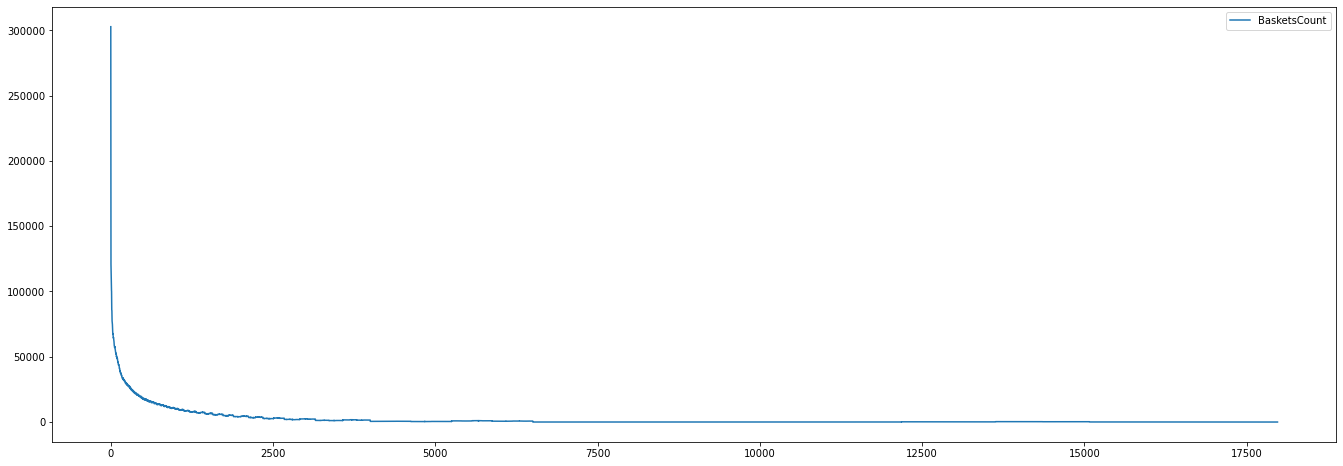

In [106]:
Number_of_baskets_customer_per_product.plot( y='BasketsCount')

<AxesSubplot:xlabel='ProductId'>

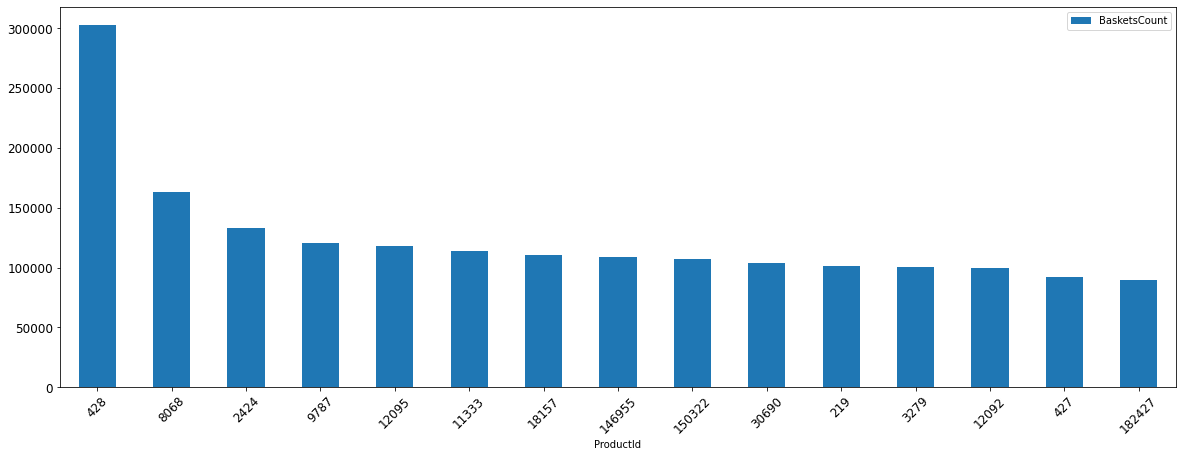

In [107]:
Number_of_baskets_customer_per_product[Number_of_baskets_customer_per_product.index<15].plot.bar(x = 'ProductId' , y='BasketsCount', grid=False, rot=45, fontsize=12 , figsize=(20,7))

In [108]:
Number_of_baskets_customer_per_product.BasketsCount.mean()

2145.8674343569205

In [109]:
Number_of_baskets_customer_per_product.BasketsCount.std()

7440.23839907357

## The most ordered category

### The Category4 data 

In [110]:
# Done and commented
Cat4 = Product.drop(columns=['CreatedOn', 'Barcode',
       'CategoryId', 'Category1Id', 'Category2Id', 'Category3Id',
       'Category1Name', 'Category2Name', 'Category3Name',
       'ProductStateCode', 'ResponsibleUser', 'Supplier',
       'CountActiveStore']).dropna()

In [111]:
Cat4.head()

,ProductId,Product,BrandId,Brand,Category4Id,Category4Name
3,190728,نارنگی درجه یک 1کیلویی بلوط,1221,بلوط,1043.0,نارنگی
88,190643,سیب زمینی ریز 1کیلویی بلوط,1221,بلوط,1035.0,پیاز و سیب زمینی
102,190629,استیک شیری غنی شده توت فرنگی 25 گرمی دنت,87,دنت,132.0,دسر
103,190628,استیک شیری غنی شده طالبی 25 گرمی دنت,87,دنت,132.0,دسر
104,190627,استیک شیری غنی شده شکلاتی 25 گرمی دنت,87,دنت,132.0,دسر


In [112]:
Cat4_products = Product.drop(columns=['CreatedOn', 'Product', 'Barcode', 'BrandId', 'Brand',
       'CategoryId', 'Category1Id', 'Category2Id', 'Category3Id',
       'Category1Name', 'Category2Name', 'Category3Name',
    'ProductStateCode', 'ResponsibleUser', 'Supplier',
       'CountActiveStore']).dropna()

In [113]:
Product_Brands = Product.drop(columns=['CreatedOn', 'Product', 'Barcode',
       'CategoryId', 'Category1Id', 'Category2Id', 'Category3Id', 'Category4Id',
       'Category1Name', 'Category2Name', 'Category3Name', 'Category4Name',
    'ProductStateCode', 'ResponsibleUser', 'Supplier',
       'CountActiveStore']).dropna()

In [114]:
Product_Brands

,ProductId,BrandId,Brand
0,190731,34182,ساوانا
1,190730,34182,ساوانا
2,190729,34182,ساوانا
3,190728,1221,بلوط
4,190727,34182,ساوانا
...,...,...,...
74291,7,708,تک
74292,6,708,تک
74293,5,103,درنا
74294,3,185,تاک


The cat4 with names

In [115]:
Data_C4 = pd.merge(left = DataF_Order_Customer_Product, right = Cat4, left_on= 'ProductId', right_on= 'ProductId')

In [116]:
Data_C4

,OrderId,CustomerId,StoreId,ProductId,Quantity,Product,BrandId,Brand,Category4Id,Category4Name
0,2524907,1335637,2225,6318,2.0,همبرگر معمولی 30% 500 گرمی صدک,765,صدک,356.0,همبرگر گوشت
1,2524553,996892,2055,6318,2.0,همبرگر معمولی 30% 500 گرمی صدک,765,صدک,356.0,همبرگر گوشت
2,2524835,1395461,2218,6318,1.0,همبرگر معمولی 30% 500 گرمی صدک,765,صدک,356.0,همبرگر گوشت
3,2523695,390543,2146,6318,1.0,همبرگر معمولی 30% 500 گرمی صدک,765,صدک,356.0,همبرگر گوشت
4,2525078,1395788,2296,6318,1.0,همبرگر معمولی 30% 500 گرمی صدک,765,صدک,356.0,همبرگر گوشت
...,...,...,...,...,...,...,...,...,...,...
38570714,9997497,2014413,1967,189573,1.0,بیسکویت سبوسدار 800 گرمی فرخنده,34040,فرخنده,383.0,بیسکویت
38570715,9997996,1555380,1984,188326,1.0,لگن گرد شماره 2 لیمون,33878,لیمون,1241.0,ظروف پلاستیکی
38570716,10015085,548778,1966,10088,1.0,شامپو بدن مینرال آبی 400 گرمی اکتیو,7,اکتیو,186.0,شامپو بدن
38570717,10016329,38056,1966,10088,1.0,شامپو بدن مینرال آبی 400 گرمی اکتیو,7,اکتیو,186.0,شامپو بدن


In [117]:
Number_of_products_ordered_C4_names = pd.merge(left=Number_of_products_ordered_names , right=Cat4_products, left_on = 'ProductId' , right_on='ProductId') 

In [118]:
# Number_of_products_ordered_C4_names['ProductScore']=Number_of_products_ordered_C4_names.index

In [119]:
Number_of_products_ordered_C4_names.head()

,ProductId,QuantitySum,Product,Barcode,Product_percent,Category4Id,Category4Name
0,428,255516.0,نوشابه خانواده 1500 سی سی کوکا کولا,6260265100264,1.891,299.0,نوشابه
1,18,168569.0,ویفر رنگارنگ 14.5 گرمی مینو,6260100121362,1.247,599.0,ویفر
2,150322,113328.0,ماکارونی 700 گرمی رشد\r\n,6.26017e+12,0.839,569.0,ماکارونی
3,423,110406.0,کیک مغزدار تاینی دوقلو 60 گرمی شیرین عسل,6261149047200,0.817,477.0,کیک
4,219,75811.0,بیسکوییت ساقه طلایی 200 گرمی مینو,6260111310106,0.561,383.0,بیسکویت


In [120]:
# Product_Score = Number_of_products_ordered_C4_names.drop(columns = ['Quantity', 'Product', 'BrandId', 'Brand', 'percent',
#        'Category4Id', 'Category4Name'])

In [121]:
Number_of_C4_products_ordered = Number_of_products_ordered_C4_names.groupby('Category4Id').agg({'QuantitySum':'sum' , 'Category4Name':'first'}).reset_index()

In [122]:
Number_of_C4_products_ordered['C4_percent'] = round(Number_of_C4_products_ordered['QuantitySum']*100/Total_Number_of_products_ordered , 2)

In [123]:
Number_of_C4_products_ordered = Number_of_C4_products_ordered.sort_values(by='C4_percent',ascending=False).reset_index(drop=True)

In [124]:
Number_of_C4_products_ordered.head()

,Category4Id,QuantitySum,Category4Name,C4_percent
0,569.0,684721.0,ماکارونی,5.07
1,477.0,656870.0,کیک,4.86
2,383.0,652403.0,بیسکویت,4.83
3,57.0,567188.0,پودر و قرص لباسشویی,4.20
4,473.0,567931.0,چیپس,4.20


In [125]:
Category_Score = Number_of_C4_products_ordered.drop(columns=['QuantitySum' , 'Category4Name'])

In [127]:
Category_Score.head()

,Category4Id,C4_percent
0,569.0,5.07
1,477.0,4.86
2,383.0,4.83
3,57.0,4.20
4,473.0,4.20


Number_of_products_ordered_C4_names_sum.plot( y='Quantity')

<AxesSubplot:xlabel='Category4Id'>

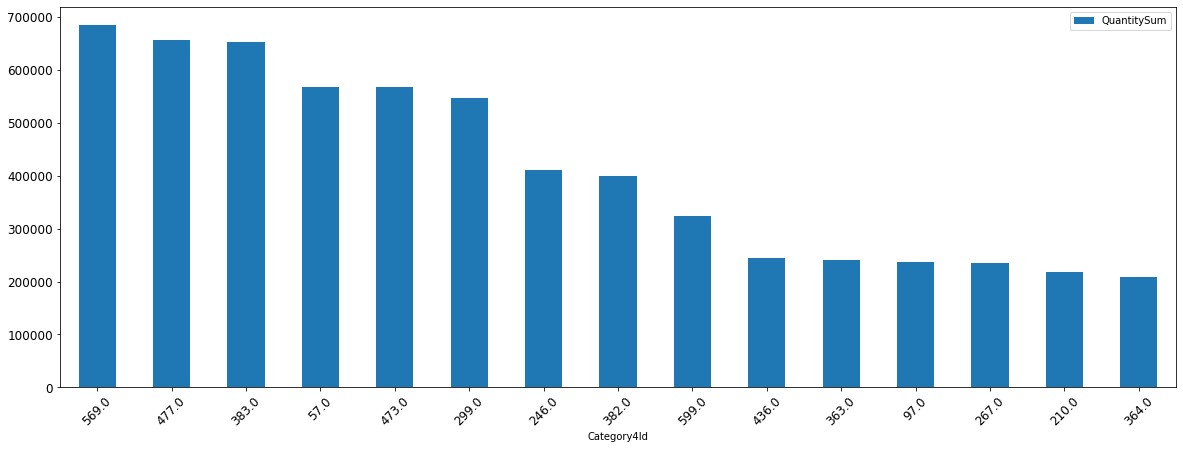

In [128]:
Number_of_C4_products_ordered[Number_of_C4_products_ordered.index<15].plot.bar(x = 'Category4Id' , y='QuantitySum', grid=False, rot=45, fontsize=12 , figsize=(20,7))

## The popularity of Category 4 between the customers

In [129]:
Number_of_baskets_customer_C4_per_product = pd.merge(left=Number_of_baskets_customer_per_product , right=Cat4_products , left_on='ProductId' , right_on='ProductId' )

In [130]:
Number_of_baskets_customer_C4_per_product = Number_of_baskets_customer_C4_per_product.groupby('Category4Id').agg({'BasketsCount':'sum' , 'percent_basket':'sum' , 'UniqueCustomersCount':'sum' , 'percent_customers':'sum' , 'Category4Name':'first'}).sort_values(by='percent_basket',ascending=False).reset_index()

In [131]:
Number_of_baskets_customer_C4_per_product.columns

Index(['Category4Id', 'BasketsCount', 'percent_basket', 'UniqueCustomersCount',
       'percent_customers', 'Category4Name'],
      dtype='object')

In [132]:
Category_Pop = Number_of_baskets_customer_C4_per_product.drop(columns=['BasketsCount', 'UniqueCustomersCount',
       'percent_customers', 'Category4Name'])

In [133]:
Category_Pop.columns = ['Category4Id' , 'C4_percent_basket']

In [134]:
Category_Pop

,Category4Id,C4_percent_basket
0,473.0,19.87
1,383.0,19.21
2,569.0,19.15
3,382.0,19.12
4,246.0,13.78
...,...,...
656,542.0,0.00
657,539.0,0.00
658,1191.0,0.00
659,1192.0,0.00


<AxesSubplot:>

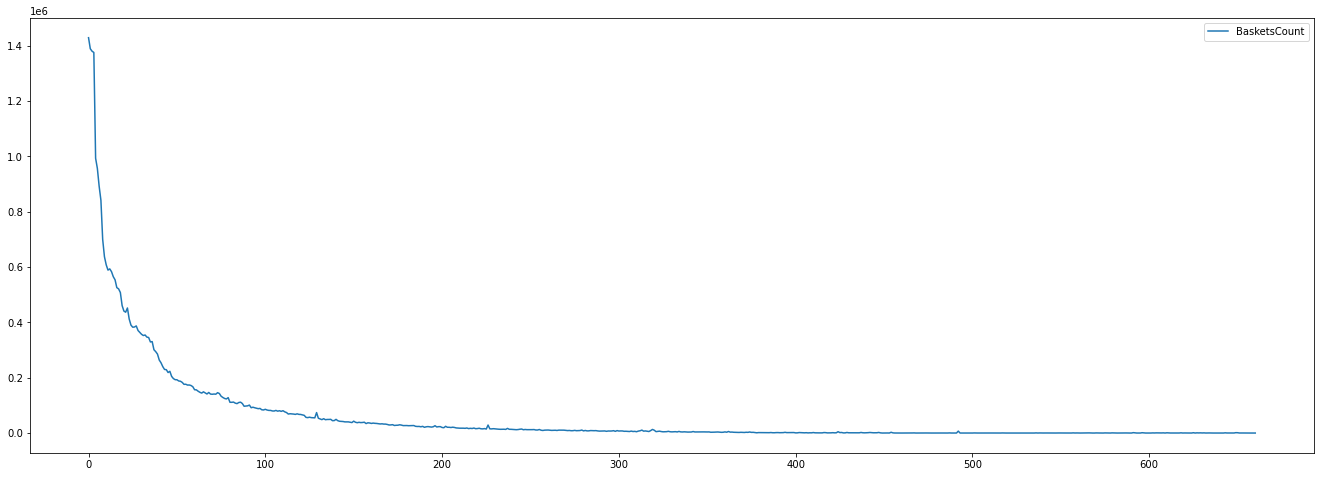

In [135]:
Number_of_baskets_customer_C4_per_product.plot( y='BasketsCount')

<AxesSubplot:xlabel='Category4Id'>

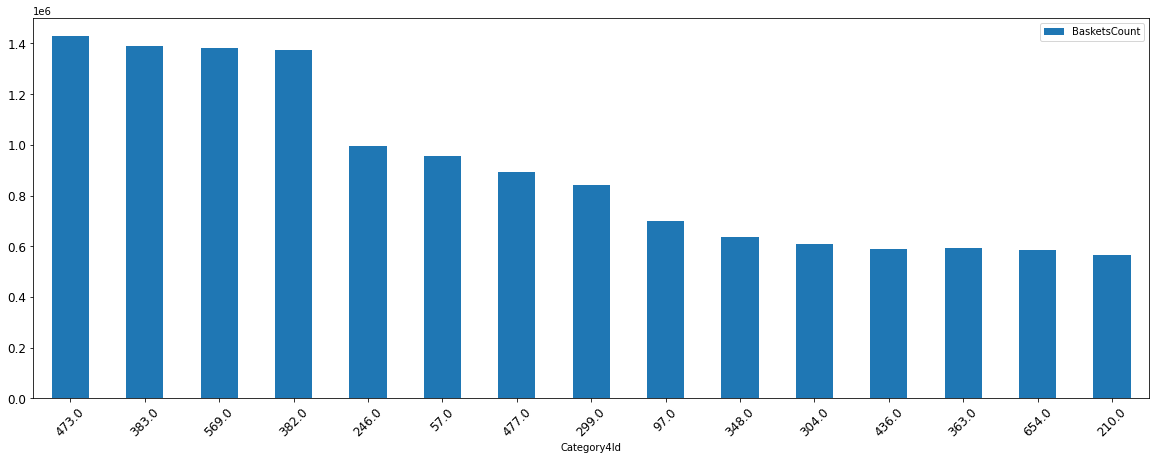

In [136]:
Number_of_baskets_customer_C4_per_product[Number_of_baskets_customer_C4_per_product.index<15].plot.bar(x = 'Category4Id' , y='BasketsCount', grid=False, rot=45, fontsize=12 , figsize=(20,7))

## Products of each category

In [137]:
C4_names = Product.drop(columns = ['CreatedOn', 'Barcode', 
       'CategoryId', 'Category1Id', 'Category2Id', 'Category3Id',
        'Category1Name', 'Category2Name', 'Category3Name',
        'ProductStateCode', 'ResponsibleUser', 'Supplier',
       'CountActiveStore','BrandId','Brand','Product']).dropna()

In [138]:
C4_names

,ProductId,Category4Id,Category4Name
3,190728,1043.0,نارنگی
88,190643,1035.0,پیاز و سیب زمینی
102,190629,132.0,دسر
103,190628,132.0,دسر
104,190627,132.0,دسر
...,...,...,...
74291,7,569.0,ماکارونی
74292,6,226.0,لازانیا
74293,5,248.0,کلوچه
74294,3,560.0,آبمیوه گازدار


In [139]:
Datarep_C4 = pd.merge(left=Datarep , right=C4_names , left_on = 'ProductId' , right_on = 'ProductId')

In [140]:
Datarep_C4_List = Datarep_C4.groupby('Category4Id').agg({'ProductId':lambda x: list(','.join(map(str , x)).split(','))}).merge(Number_of_C4_products_ordered,left_on='Category4Id' , right_on='Category4Id').sort_values(by='C4_percent',ascending=False).reset_index(drop=True)

In [141]:
Datarep_C4_List_basket = Datarep_C4.groupby('Category4Id').agg({'ProductId':lambda x: list(','.join(map(str , x)).split(','))}).merge(Number_of_baskets_customer_C4_per_product,left_on='Category4Id' , right_on='Category4Id').sort_values(by='percent_basket',ascending=False).reset_index(drop=True)

In [142]:
Datarep_C4_List

,Category4Id,ProductId,QuantitySum,Category4Name,C4_percent
0,569.0,"[150322, 150322, 150322, 150322, 150322, 15032...",684721.0,ماکارونی,5.07
1,477.0,"[13837, 13837, 13837, 13837, 13837, 13837, 138...",656870.0,کیک,4.86
2,383.0,"[182420, 182420, 182420, 182420, 182420, 18242...",652403.0,بیسکویت,4.83
3,57.0,"[147464, 147464, 147464, 147464, 147464, 14746...",567188.0,پودر و قرص لباسشویی,4.20
4,473.0,"[3279, 3279, 3279, 3279, 3279, 3279, 3279, 327...",567931.0,چیپس,4.20
...,...,...,...,...,...
566,1014.0,"[182962, 182962, 182962, 182962, 182962]",5.0,پودر فلافل,0.00
567,1044.0,"[189942, 189942, 189942, 189942, 189942, 18994...",32.0,هندوانه و طالبی,0.00
568,1048.0,"[178210, 178210, 178210, 178210, 178210, 17821...",28.0,ریمل,0.00
569,1049.0,"[173427, 173427, 173427, 173427, 173427, 17342...",19.0,خط چشم,0.00


In [143]:
Datarep_C4_List_basket

,Category4Id,ProductId,BasketsCount,percent_basket,UniqueCustomersCount,percent_customers,Category4Name
0,473.0,"[3279, 3279, 3279, 3279, 3279, 3279, 3279, 327...",1429501,19.87,1172591,16.34,چیپس
1,383.0,"[182420, 182420, 182420, 182420, 182420, 18242...",1389509,19.21,1183093,16.31,بیسکویت
2,569.0,"[150322, 150322, 150322, 150322, 150322, 15032...",1380563,19.15,1224892,16.94,ماکارونی
3,382.0,"[17038, 17038, 17038, 17038, 17038, 17038, 170...",1376065,19.12,1057496,14.72,پنیر صبحانه
4,246.0,"[8889, 8889, 8889, 8889, 8889, 8889, 8889, 888...",993714,13.78,824769,11.43,اسنک
...,...,...,...,...,...,...,...
566,1200.0,"[166622, 166622, 166622, 166622, 166622, 16662...",594,0.00,507,0.00,چای ترش
567,1201.0,"[151518, 151518, 151518]",227,0.00,208,0.00,گرده غوره
568,1203.0,"[47061, 47061, 47061, 47061, 47061, 47061, 470...",296,0.00,254,0.00,حلیم
569,1205.0,"[146697, 146697, 146697, 146697, 146697, 14669...",631,0.00,534,0.00,سایر ترشیجات


In [144]:
# First_Number_of_C4_products_ordered = Datarep_C4_List.loc[:39]

In [145]:
# First_Number_of_products_ordered_C4_basket = Datarep_C4_List_basket.loc[:39]

In [146]:
Number_of_products_ordered_names

,ProductId,QuantitySum,Product,Barcode,Product_percent
0,428,255516.0,نوشابه خانواده 1500 سی سی کوکا کولا,6260265100264,1.891
1,18,168569.0,ویفر رنگارنگ 14.5 گرمی مینو,6260100121362,1.247
2,150322,113328.0,ماکارونی 700 گرمی رشد\r\n,6.26017e+12,0.839
3,423,110406.0,کیک مغزدار تاینی دوقلو 60 گرمی شیرین عسل,6261149047200,0.817
4,219,75811.0,بیسکوییت ساقه طلایی 200 گرمی مینو,6260111310106,0.561
...,...,...,...,...,...
7713,187932,19.0,پودر ژله با طعم طالبی 100 گرمی آیدین,6.26011e+12,0.000
7712,173586,19.0,شکلات مغزدار نوقا خلال بادام،نانی 40گرمی شیرین...,6.26115e+12,0.000
7711,184684,19.0,شیر استریل کم چرب 200 میلی لیتری ویژه,6.26077e+12,0.000
7710,58976,19.0,آبمیوه گوجه فرنگی 1 لیتری سن ایچ,6.2601e+12,0.000


In [147]:
Number_of_baskets_customer_C4_per_product.columns

Index(['Category4Id', 'BasketsCount', 'percent_basket', 'UniqueCustomersCount',
       'percent_customers', 'Category4Name'],
      dtype='object')

In [148]:
Category_Pop = Number_of_baskets_customer_C4_per_product.drop(columns=['BasketsCount', 'UniqueCustomersCount',
       'percent_customers', 'Category4Name'])

In [149]:
Category_Pop.columns=['Category4Id' , 'C4_persent_basket']

In [150]:
Number_of_C4_products_ordered

,Category4Id,QuantitySum,Category4Name,C4_percent
0,569.0,684721.0,ماکارونی,5.07
1,477.0,656870.0,کیک,4.86
2,383.0,652403.0,بیسکویت,4.83
3,57.0,567188.0,پودر و قرص لباسشویی,4.20
4,473.0,567931.0,چیپس,4.20
...,...,...,...,...
566,1014.0,5.0,پودر فلافل,0.00
567,1044.0,32.0,هندوانه و طالبی,0.00
568,1048.0,28.0,ریمل,0.00
569,1049.0,19.0,خط چشم,0.00


In [151]:
Number_of_C4_products_ordered

,Category4Id,QuantitySum,Category4Name,C4_percent
0,569.0,684721.0,ماکارونی,5.07
1,477.0,656870.0,کیک,4.86
2,383.0,652403.0,بیسکویت,4.83
3,57.0,567188.0,پودر و قرص لباسشویی,4.20
4,473.0,567931.0,چیپس,4.20
...,...,...,...,...
566,1014.0,5.0,پودر فلافل,0.00
567,1044.0,32.0,هندوانه و طالبی,0.00
568,1048.0,28.0,ریمل,0.00
569,1049.0,19.0,خط چشم,0.00


In [152]:
Datarep_C4_List = Datarep_C4_List.rename(columns={'ProductId':'C4_Ordered_ProductId'})

In [153]:
Datarep_C4_List

,Category4Id,C4_Ordered_ProductId,QuantitySum,Category4Name,C4_percent
0,569.0,"[150322, 150322, 150322, 150322, 150322, 15032...",684721.0,ماکارونی,5.07
1,477.0,"[13837, 13837, 13837, 13837, 13837, 13837, 138...",656870.0,کیک,4.86
2,383.0,"[182420, 182420, 182420, 182420, 182420, 18242...",652403.0,بیسکویت,4.83
3,57.0,"[147464, 147464, 147464, 147464, 147464, 14746...",567188.0,پودر و قرص لباسشویی,4.20
4,473.0,"[3279, 3279, 3279, 3279, 3279, 3279, 3279, 327...",567931.0,چیپس,4.20
...,...,...,...,...,...
566,1014.0,"[182962, 182962, 182962, 182962, 182962]",5.0,پودر فلافل,0.00
567,1044.0,"[189942, 189942, 189942, 189942, 189942, 18994...",32.0,هندوانه و طالبی,0.00
568,1048.0,"[178210, 178210, 178210, 178210, 178210, 17821...",28.0,ریمل,0.00
569,1049.0,"[173427, 173427, 173427, 173427, 173427, 17342...",19.0,خط چشم,0.00


In [154]:
tata = np.unique(Datarep_C4_List.loc[0]['C4_Ordered_ProductId'],return_counts=True)

In [155]:
Product_Score

,ProductId,Product_percent
0,428,1.891
1,18,1.247
2,150322,0.839
3,423,0.817
4,219,0.561
...,...,...
7713,187932,0.000
7712,173586,0.000
7711,184684,0.000
7710,58976,0.000


In [156]:
for i in range(Datarep_C4_List.shape[0]):
    unique_counts = np.unique(Datarep_C4_List.loc[i]['C4_Ordered_ProductId'],return_counts=True)
    a = zip(unique_counts[0] , unique_counts[1] , [Datarep_C4_List.loc[i]['Category4Name']]*len(unique_counts[0]), 
            [Datarep_C4_List.loc[i]['Category4Id']]*len(unique_counts[0]))
    locals()['Cat4_'+str(i)] = pd.DataFrame(a,columns=['ProductId' , 'Count' , 'Category4Name' , 'Category4Id'])
    SUM = locals()['Cat4_'+str(i)]['Count'].sum()
    locals()['Cat4_'+str(i)]['Product_C4_percent'] = round(locals()['Cat4_'+str(i)]['Count']*100/SUM , 2)
    locals()['Cat4_'+str(i)]['ProductId'] = locals()['Cat4_'+str(i)]['ProductId'].apply(int)
#     locals()['Cat4_'+str(i)] = pd.merge(left = locals()['Cat4_'+str(i)] , right=Product_Score , 
#                                         left_on = 'ProductId' , right_on='ProductId').reset_index(drop=True)
    locals()['Cat4_'+str(i)] = pd.merge(left = locals()['Cat4_'+str(i)] ,
                                                    right= Product_Brands , 
                                                    left_on='ProductId' , 
                                                    right_on = 'ProductId').sort_values(by='Product_C4_percent',ascending=False).reset_index(drop=True)
    locals()['Cat4_'+str(i)] = pd.merge(left = locals()['Cat4_'+str(i)] ,
                                                    right= Product_names , 
                                                    left_on='ProductId' , 
                                                    right_on = 'ProductId')
#     locals()['Cat4_'+str(i)]['CategoryProductScore']=locals()['Cat4_'+str(i)].index
    locals()['Cat4_'+str(i)+'_Brands'] = locals()['Cat4_'+str(i)].groupby('BrandId').agg({'Product_C4_percent':'sum'}).sort_values(by='Product_C4_percent',ascending=False).reset_index()
    locals()['Cat4_'+str(i)+'_BrandScore'] = locals()['Cat4_'+str(i)+'_Brands'].rename(columns = {'Product_C4_percent':'C4_Brand_percent'})
#     locals()['Cat4_'+str(i)+'_BrandScore'] = locals()['Cat4_'+str(i)+'_Brands'].drop(columns = ['Category4Name', 'Brand', 'Product_C4_percent'])
    locals()['Cat4_'+str(i)] = pd.merge(left = locals()['Cat4_'+str(i)] , right=locals()['Cat4_'+str(i)+'_BrandScore'] , 
                                        left_on = 'BrandId' , right_on='BrandId').reset_index(drop=True)
    locals()['Cat4_'+str(i)] = pd.merge(left = locals()['Cat4_'+str(i)] , right=Product_Pop , 
                                        left_on = 'ProductId' , right_on='ProductId').reset_index(drop=True)
    locals()['Cat4_'+str(i)] = pd.merge(left = locals()['Cat4_'+str(i)] , right=Category_Pop , 
                                        left_on = 'Category4Id' , right_on='Category4Id').reset_index(drop=True)
    locals()['Cat4_'+str(i)] = pd.merge(left = locals()['Cat4_'+str(i)] , right=Product_Score , 
                                        left_on = 'ProductId' , right_on='ProductId').reset_index(drop=True)
    locals()['Cat4_'+str(i)] = pd.merge(left = locals()['Cat4_'+str(i)] , right=Category_Score , 
                                        left_on = 'Category4Id' , right_on='Category4Id').reset_index(drop=True)
    locals()['Cat4_'+str(i)] = pd.merge(left = locals()['Cat4_'+str(i)] , right=Product_Region_percent , 
                                        left_on = 'ProductId' , right_on='ProductId').reset_index(drop=True)
    locals()['Cat4_'+str(i)] = pd.merge(left = locals()['Cat4_'+str(i)] , right=Product_Region_Score , 
                                        left_on = 'ProductId' , right_on='ProductId').reset_index(drop=True)

    
#     locals()['Cat4_'+str(i)+'_First10_percent'] = pd.DataFrame(locals()['Cat4_'+str(i)].loc[0]['Category4Id'] , 
#                                                                locals()['Cat4_'+str(i)].loc[0]['Category4Name'] , 
#                                                                locals()['Cat4_'+str(i)].loc[:9]['Product_C4_percent'].sum(),
#                                                                columns = ['Category4Id' , 'Category4Name' , 'First10_percent_sum'])
                                                            
    if i == 0:
        Must_SKU_List = locals()['Cat4_'+str(i)]
    else:
        Must_SKU_List = Must_SKU_List.append(locals()['Cat4_'+str(i)])

# Must_SKU_List = Must_SKU_List.sort_values(by = 'ProductScore').reset_index(drop=True)

In [158]:
NOP = 0
for i in range(Datarep_C4_List.shape[0]):
    NOP = NOP+locals()['Cat4_'+str(i)].shape[0]
print(NOP)

12458


In [160]:
Must_SKU_List.head()

,ProductId,Count,Category4Name,Category4Id,Product_C4_percent,BrandId,Brand,Product,Barcode,C4_Brand_percent,Product_percent_basket,C4_persent_basket,Product_percent,C4_percent,Region_percent,30percent_Region_Count
0,150322,113328,ماکارونی,569.0,16.55,32618,رشد,ماکارونی 700 گرمی رشد\r\n,6.26017e+12,17.44,1.26,19.15,0.839,5.07,"[(0.0, 6.02), (1.0, 94.34), (2.0, 90.72), (...",15.0
1,144840,6124,ماکارونی,569.0,0.89,32618,رشد,ماکارونی فرم پروانه 500 گرمی رشد \r\n,6.26017e+12,17.44,0.35,19.15,0.045,5.07,"[(1.0, 67.92), (2.0, 66.49), (3.0, 89.36), ...",14.0
2,408,60748,ماکارونی,569.0,8.87,59,زر,ماکارونی پیگولی 500 گرمی زر,6260532813415,47.69,0.93,19.15,0.450,5.07,"[(0.0, 21.69), (1.0, 93.4), (2.0, 87.63), (...",15.0
3,391,41358,ماکارونی,569.0,6.04,59,زر,اسپاگتی 1.5 رشته ای 700 گرمی زر,6260532810025,47.69,0.71,19.15,0.306,5.07,"[(0.0, 21.69), (1.0, 87.74), (2.0, 84.02), ...",15.0
4,389,36771,ماکارونی,569.0,5.37,59,زر,ماکارونی فرمی شلز500 گرمی زر,6260532813514,47.69,0.61,19.15,0.272,5.07,"[(0.0, 20.48), (1.0, 93.4), (2.0, 87.11), (...",15.0


In [159]:
Must_SKU_List.to_csv('MSL.csv' , encoding='utf-8-sig')